In [53]:
import sys

sys.path.append("../../src/2d")

In [54]:
import matrix_element_sparse
import importlib
from scipy.sparse.linalg import cg
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

importlib.reload(matrix_element_sparse)
from matrix_element_sparse import *

In [55]:
m, n = 20, 20
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [56]:
mel = Mel2d(x, y)

In [57]:
p, t, b = mel.generate_mesh()

In [58]:
K = mel.stiffness_matrix()

f = mel.force()

In [59]:
for i in b:
    K[i] = 0
    K[i, i] = 1
    f[i] = 0

/home/yamamoto/venvs/physics/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [60]:
U, info = cg(K, f)

In [61]:
K.shape

(400, 400)

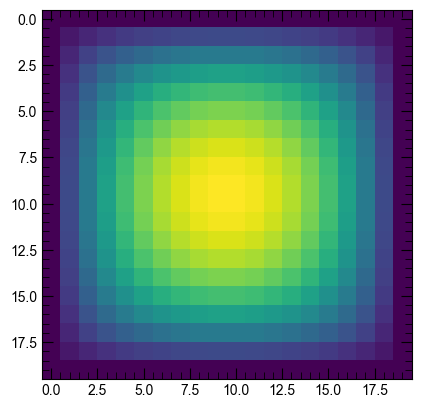

In [62]:
fig, ax = plt.subplots()
ax.imshow(U.reshape(m, n))

In [64]:
fig = go.Figure(data=[go.Surface(x=x, y=y, z=U.reshape(m, n), colorscale="Viridis")])
fig.update_layout(
    title="3D Surface Plot",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig.show()
fig.write_html("surface_plot.html")